In [278]:
import pandas as pd
import seaborn as sns
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib

In [137]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
import requests
from urllib.parse import urlencode
from io import BytesIO
from zipfile import ZipFile

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/eKrKcePyWEM2mw'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
response = requests.get(download_url)

dist_path = 'datasets'
zipfile = ZipFile(BytesIO(response.content))
zipfile.extractall(path=dist_path)

In [152]:
src_dataset = pd.read_csv('datasets/Vizualisation/auto.csv', encoding="utf-8")

In [153]:
src_dataset.head()

,mark,model,pokolenie,car_type,год выпуска,Цена,Пробег,Цвет,"Выбросы CO2, г/км",Высота,"Диаметр цилиндра и ход поршня, мм",Длина,Задние тормоза,Класс автомобиля,Клиренс,Количество дверей,Количество мест,Количество передач,Количество цилиндров,Колёсная база,Коробка,Коробка передач,"Максимальная мощность, л.с./кВт при об/мин","Максимальная скорость, км/ч","Максимальный крутящий момент, Н*м при об/мин",Марка топлива,Мощность,Объем,"Объем багажника мин/макс, л","Объем двигателя, см³","Объём топливного бака, л",Передние тормоза,"Полная масса, кг",Привод,Разгон,"Разгон до 100 км/ч, с",Размер колёс,Расположение двигателя,Расположение цилиндров,Расход,"Расход топлива, л город/трасса/смешанный",Система питания двигателя,"Снаряженная масса, кг",Степень сжатия,Страна марки,Тип двигателя,Тип задней подвески,Тип наддува,Тип передней подвески,Тип привода,Топливо,Число клапанов на цилиндр,Ширина,Ширина задней колеи,Ширина передней колеи,Экологический класс,Оценка безопасности,Название рейтинга
0,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2020.0,20 000 000 ₽,8000.0,белый,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN
1,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2019.0,15 499 999 ₽,35000.0,чёрный,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN
2,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2020.0,19300000₽,0.0,Чёрный,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN
3,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2020.0,28300000₽,0.0,Чёрный,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN
4,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2019.0,18 350 000 ₽,14200.0,белый,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN


In [154]:
src_dataset.shape

(10099, 58)

In [155]:
N = 68

In [156]:
for i in range(1, N):
    try:
        tmp_dataset = pd.read_csv('datasets/Vizualisation/auto' + str(i) + '.csv')
        src_dataset = pd.concat([src_dataset, tmp_dataset], ignore_index=True)
    except Exception as e:
        print(e)

In [157]:
src_dataset.head()

,mark,model,pokolenie,car_type,год выпуска,Цена,Пробег,Цвет,"Выбросы CO2, г/км",Высота,"Диаметр цилиндра и ход поршня, мм",Длина,Задние тормоза,Класс автомобиля,Клиренс,Количество дверей,Количество мест,Количество передач,Количество цилиндров,Колёсная база,Коробка,Коробка передач,"Максимальная мощность, л.с./кВт при об/мин","Максимальная скорость, км/ч","Максимальный крутящий момент, Н*м при об/мин",Марка топлива,Мощность,Объем,"Объем багажника мин/макс, л","Объем двигателя, см³","Объём топливного бака, л",Передние тормоза,"Полная масса, кг",Привод,Разгон,"Разгон до 100 км/ч, с",Размер колёс,Расположение двигателя,Расположение цилиндров,Расход,"Расход топлива, л город/трасса/смешанный",Система питания двигателя,"Снаряженная масса, кг",Степень сжатия,Страна марки,Тип двигателя,Тип задней подвески,Тип наддува,Тип передней подвески,Тип привода,Топливо,Число клапанов на цилиндр,Ширина,Ширина задней колеи,Ширина передней колеи,Экологический класс,Оценка безопасности,Название рейтинга
0,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2020.0,20 000 000 ₽,8000.0,белый,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN
1,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2019.0,15 499 999 ₽,35000.0,чёрный,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN
2,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2020.0,19300000₽,0.0,Чёрный,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN
3,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2020.0,28300000₽,0.0,Чёрный,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN
4,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2019.0,18 350 000 ₽,14200.0,белый,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN


In [158]:
src_dataset.shape

(81086, 58)

In [159]:
src_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81086 entries, 0 to 81085
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   mark                                          81086 non-null  object 
 1   model                                         81085 non-null  object 
 2   pokolenie                                     81085 non-null  object 
 3   car_type                                      81085 non-null  object 
 4   год выпуска                                   81085 non-null  float64
 5   Цена                                          81085 non-null  object 
 6   Пробег                                        81085 non-null  float64
 7   Цвет                                          81085 non-null  object 
 8   Выбросы CO2, г/км                             38083 non-null  float64
 9   Высота                                        78573 non-null 

In [160]:
src_dataset["Цена"].fillna("0 ₽", inplace=True)

In [161]:
src_dataset['Цена'] = src_dataset['Цена'].str.replace('\xa0', '').str.replace('₽', '').astype(int)

In [162]:
src_dataset = src_dataset.drop_duplicates()

<Axes: xlabel='Цена', ylabel='Density'>

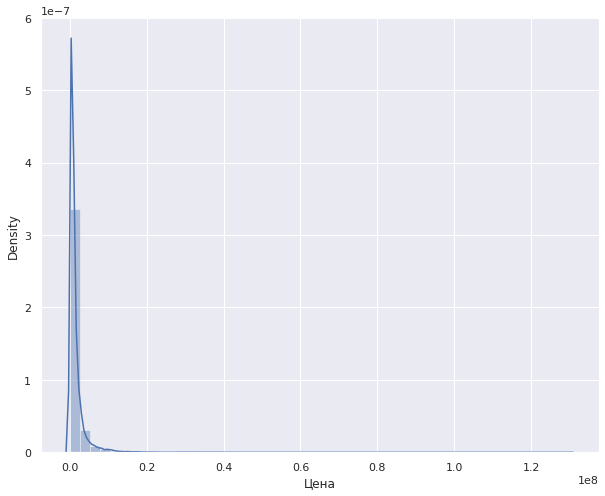

In [163]:
width = 10
height = 8

sns.set(rc = {'figure.figsize':(width, height)})

sns.distplot(src_dataset['Цена'])

<Axes: xlabel='Цена', ylabel='Density'>

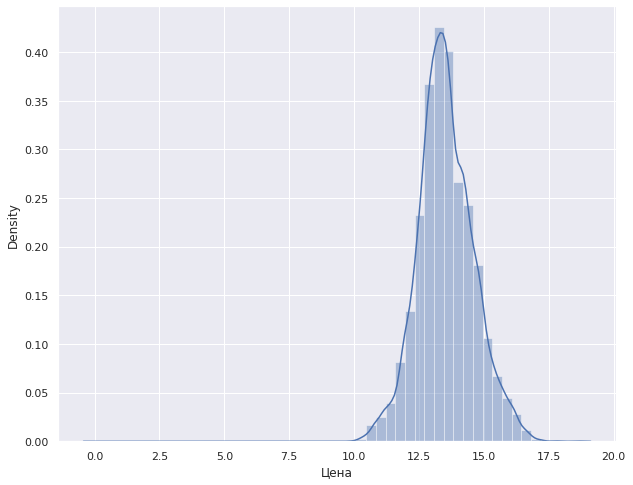

In [164]:
width = 10
height = 8

sns.set(rc = {'figure.figsize':(width, height)})

sns.distplot(np.log(src_dataset['Цена'] + 1))

In [165]:
def get_cols(df):
    categorical_feature_mask = df.dtypes == object
    number_feature_mask = df.dtypes != object
    
    numbers_cols = df.columns[number_feature_mask].tolist()
    categorical_cols = df.columns[categorical_feature_mask].tolist()
    
    return [numbers_cols, categorical_cols]

In [166]:
numbers_cols, categorical_cols = get_cols(src_dataset)

# Заменяем пропуски на медиану
for col in src_dataset[numbers_cols].columns.to_list():
    src_dataset[col] = src_dataset[col].fillna(src_dataset[col].median())

In [167]:
src_dataset.head()

,mark,model,pokolenie,car_type,год выпуска,Цена,Пробег,Цвет,"Выбросы CO2, г/км",Высота,"Диаметр цилиндра и ход поршня, мм",Длина,Задние тормоза,Класс автомобиля,Клиренс,Количество дверей,Количество мест,Количество передач,Количество цилиндров,Колёсная база,Коробка,Коробка передач,"Максимальная мощность, л.с./кВт при об/мин","Максимальная скорость, км/ч","Максимальный крутящий момент, Н*м при об/мин",Марка топлива,Мощность,Объем,"Объем багажника мин/макс, л","Объем двигателя, см³","Объём топливного бака, л",Передние тормоза,"Полная масса, кг",Привод,Разгон,"Разгон до 100 км/ч, с",Размер колёс,Расположение двигателя,Расположение цилиндров,Расход,"Расход топлива, л город/трасса/смешанный",Система питания двигателя,"Снаряженная масса, кг",Степень сжатия,Страна марки,Тип двигателя,Тип задней подвески,Тип наддува,Тип передней подвески,Тип привода,Топливо,Число клапанов на цилиндр,Ширина,Ширина задней колеи,Ширина передней колеи,Экологический класс,Оценка безопасности,Название рейтинга
0,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2020.0,20000000,8000.0,белый,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN
1,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2019.0,15499999,35000.0,чёрный,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN
2,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2020.0,19300000,0.0,Чёрный,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN
3,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2020.0,28300000,0.0,Чёрный,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN
4,Mercedes-Benz,G-Класс AMG,II (W463) 2018 – н.в.,Внедорожник 5 дв.,2019.0,18350000,14200.0,белый,304.0,1984.0,83 × 92,4873.0,дисковые вентилируемые,J,NaN,5.0,5,9.0,8.0,2890.0,автомат,автомат,585 / 430 при 6000,220.0,850 при 2500 – 3500,АИ-98,585 л.с.,4.0 л,667/1941,3982.0,100.0,дисковые вентилируемые,3200.0,полный,4.5 с,4.5,275/50/R20,"переднее, продольное",V-образное,13.3 л,16.5/11.5/13.3,непосредственный впрыск (прямой),2485.0,10.5,Германия,бензин,"зависимая, пружинная",турбонаддув,"независимая, пружинная",полный,АИ-98,4.0,1984.0,1654.0,1654.0,Euro 6,NaN,NaN


In [168]:
src_dataset[numbers_cols].apply(lambda x: x.isna().sum())

год выпуска                    0
Цена                           0
Пробег                         0
Выбросы CO2, г/км              0
Высота                         0
Длина                          0
Количество дверей              0
Количество передач             0
Количество цилиндров           0
Колёсная база                  0
Максимальная скорость, км/ч    0
Объем двигателя, см³           0
Объём топливного бака, л       0
Полная масса, кг               0
Разгон до 100 км/ч, с          0
Снаряженная масса, кг          0
Степень сжатия                 0
Число клапанов на цилиндр      0
Ширина                         0
Ширина задней колеи            0
Ширина передней колеи          0
dtype: int64

In [169]:
src_dataset["car_type"]

0        Внедорожник 5 дв. 
1        Внедорожник 5 дв. 
2        Внедорожник 5 дв. 
3        Внедорожник 5 дв. 
4        Внедорожник 5 дв. 
                ...        
81081                Седан 
81082                Седан 
81083                Седан 
81084                Седан 
81085                Седан 
Name: car_type, Length: 23625, dtype: object

In [172]:
src_dataset['car_type'] = src_dataset.apply(lambda row: str(row["car_type"]).split()[0], axis=1)

In [177]:
src_dataset['Рестайлинг'] = src_dataset.apply(lambda row: 1 if 'Рестайлинг' in str(row["pokolenie"]) else 0, axis=1)

In [181]:
src_dataset['Диаметр цилиндра и ход поршня, мм'] = src_dataset.apply(\
    lambda row: float(row['Диаметр цилиндра и ход поршня, мм'].split(' × ')[0]) \
                      if str(row['Диаметр цилиндра и ход поршня, мм']).split('/')[0].strip() not in ['nan', '-'] else 0, axis = 1)

In [183]:
src_dataset['Максимальная мощность, л.с./кВт при об/мин'] = src_dataset.apply(\
    lambda row: float(row['Максимальная мощность, л.с./кВт при об/мин'].split('/')[0].strip()) \
                      if str(row['Максимальная мощность, л.с./кВт при об/мин']).split('/')[0].strip() not in ['nan', '-'] else 0, axis = 1)

In [184]:
src_dataset['Максимальный крутящий момент, Н*м при об/мин'] = src_dataset.apply(\
    lambda row: float(row['Максимальный крутящий момент, Н*м при об/мин'].split(' ')[0]) \
                      if str(row['Максимальный крутящий момент, Н*м при об/мин']).split('/')[0] not in ['nan', '-'] else 0, axis = 1)

In [185]:
src_dataset['Объем'] = src_dataset.apply(\
    lambda row: float(row['Объем'].split(' ')[0]) \
                      if str(row['Объем']).split('/')[0].strip() not in ['nan', '-'] else 0, axis = 1)

In [187]:
src_dataset['Объем багажника max'] = src_dataset.apply(\
    lambda row: float(row['Объем багажника мин/макс, л'].split('/')[0]) \
                      if str(row['Объем багажника мин/макс, л']).split('/')[0] not in ['nan', '-'] else 0, axis = 1)

In [190]:
src_dataset['Объем багажника min'] = src_dataset.apply(\
    lambda row: float(row['Объем багажника мин/макс, л'].split('/')[1]) \
                      if len(str(row['Объем багажника мин/макс, л']).split('/')) > 1 else 0, axis = 1)

In [191]:
src_dataset['Расход'] = src_dataset.apply(\
    lambda row: float(str(row['Расход']).split(' ')[0]) \
                      if len(str(row['Расход']).split(' ')) != 1 else 0, axis = 1)

In [192]:
src_dataset['Расход л город'] = src_dataset.apply(\
    lambda row: float(str(row['Расход топлива, л город/трасса/смешанный']).split('/')[0]) \
                      if len(str(row['Расход топлива, л город/трасса/смешанный']).split('/')) != 1 else 0, axis = 1)

In [193]:
src_dataset['Расход л трасса'] = src_dataset.apply(\
    lambda row: float(str(row['Расход топлива, л город/трасса/смешанный']).split('/')[1]) \
                      if len(str(row['Расход топлива, л город/трасса/смешанный']).split('/')) != 1 else 0, axis = 1)

In [194]:
src_dataset['Расход л среднее'] = src_dataset.apply(\
    lambda row: float(str(row['Расход топлива, л город/трасса/смешанный']).split('/')[2]) \
                      if len(str(row['Расход топлива, л город/трасса/смешанный']).split('/')) != 1 else 0, axis = 1)

In [203]:
src_dataset['Клиренс'] = src_dataset.apply(\
    lambda row: float(str(row['Клиренс']).split(',')[0]) if not m.isnan(float(str(row['Клиренс']).split(',')[0])) else 0, axis = 1)

In [204]:
src_dataset['Количество мест'] = src_dataset.apply(\
    lambda row: float(float(str(row['Количество мест']).split(',')[0])) if not m.isnan(float(str(row['Количество мест']).split(',')[0])) else 0, axis = 1)

In [208]:
src_dataset.drop(["Оценка безопасности", "Название рейтинга"], axis = 1, inplace=True)

In [209]:
src_dataset.to_csv("auto_sample.csv")

In [232]:
X = src_dataset.dtypes.value_counts()
Labels = ["float", "object", "int"]

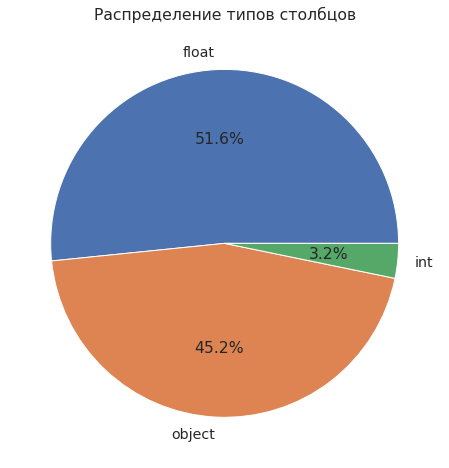

In [243]:
sns.set_style("whitegrid")
sns.set (font_scale= 1.3)

plt.figure(figsize=(10, 8))
plt.pie(X, labels=Labels, autopct='%1.1f%%')
plt.title('Распределение типов столбцов')
plt.show()

In [246]:
X = src_dataset['mark'].value_counts()

In [265]:
X = src_dataset.groupby(['mark']).size()

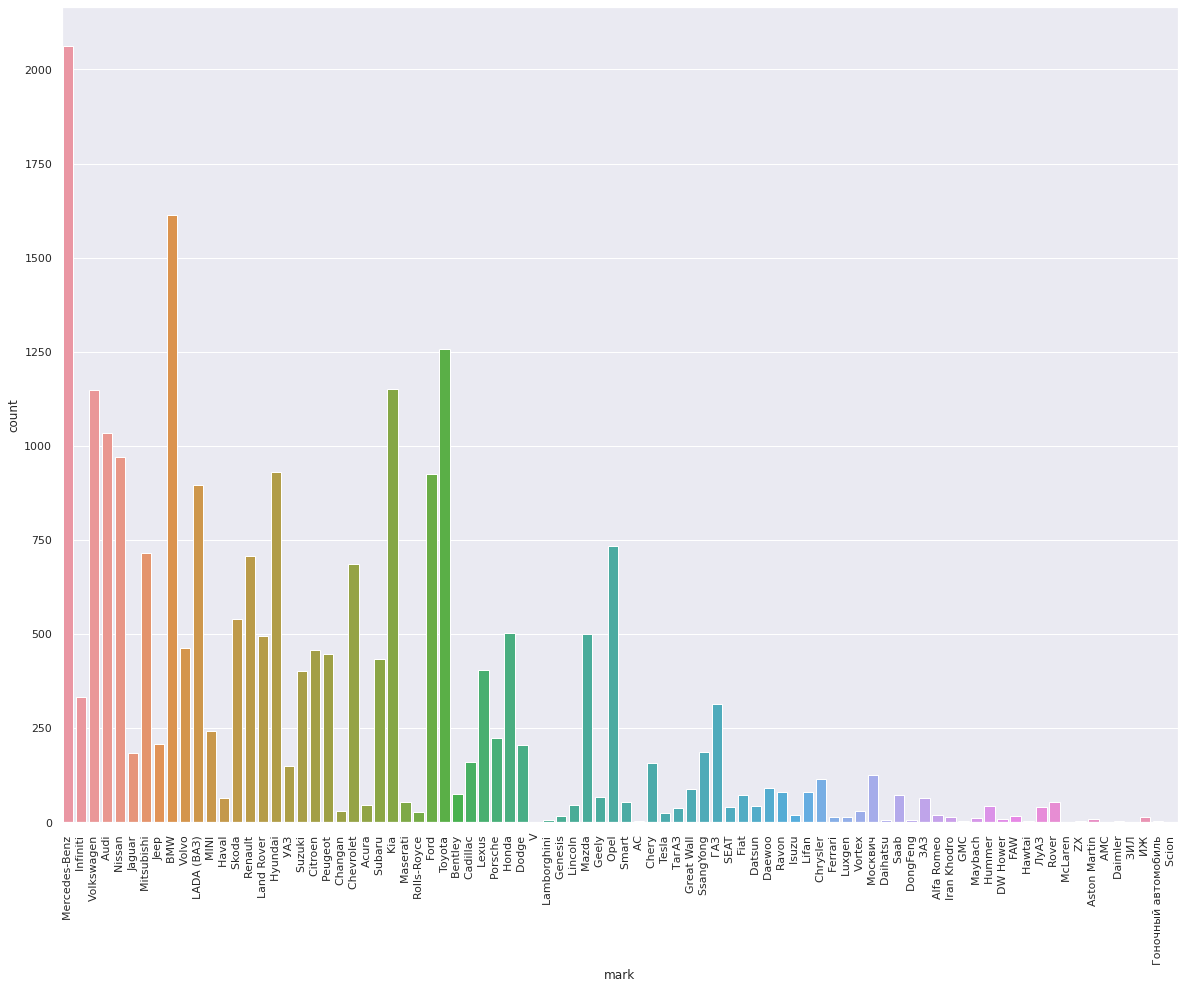

In [285]:
width = 20
height = 15

sns.set(rc = {'figure.figsize':(width, height)})
chart = sns.countplot(src_dataset, x="mark")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

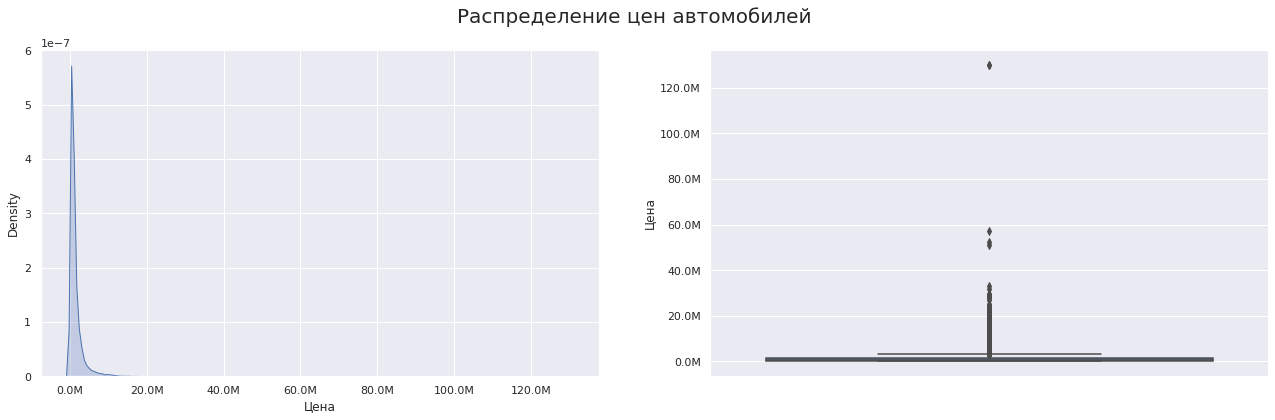

In [287]:
def millions(x, pos):
    return '{:,.1f}M'.format(x*1e-6)
fmtr = matplotlib.ticker.FuncFormatter(millions)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(src_dataset.Цена, shade=True)
_ = ax.xaxis.set_major_formatter(fmtr)

plt.subplot(1,2,2)
ax = sns.boxplot(y=src_dataset.Цена)
_ = ax.yaxis.set_major_formatter(fmtr)

fig.suptitle("Распределение цен автомобилей",fontsize=20)
sns.set (font_scale= 1)
plt.show()

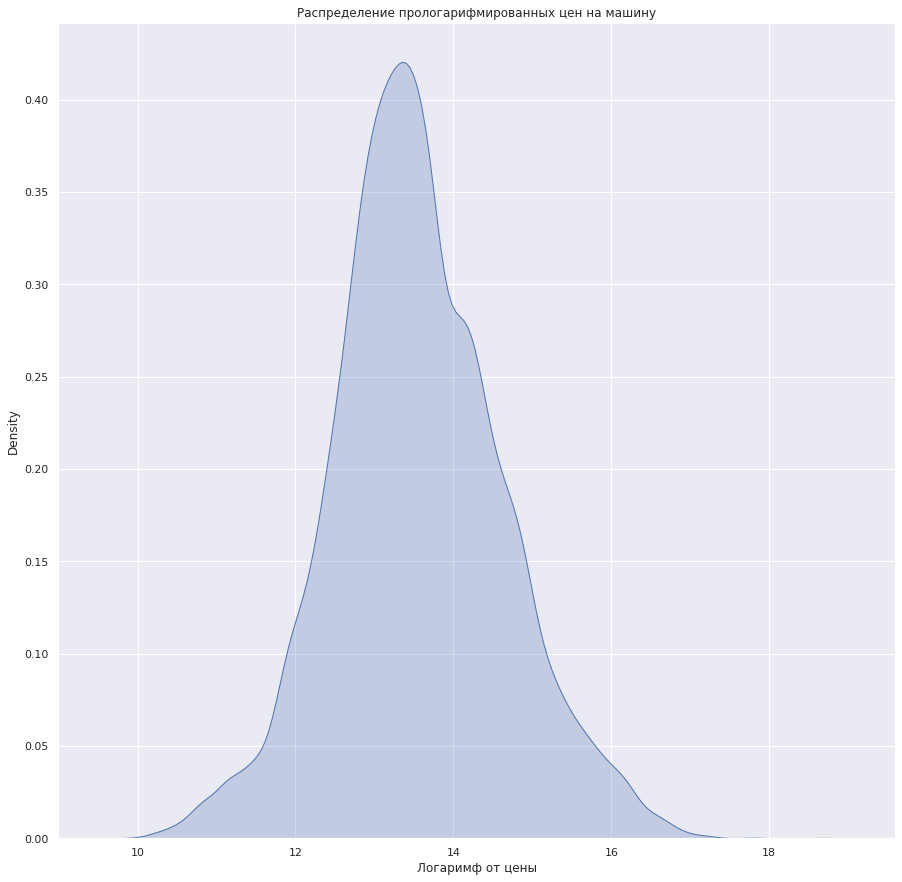

In [296]:
plt.figure(figsize=(15, 15))
ax = sns.kdeplot(np.log(src_dataset.Цена), shade=True)
plt.title('Распределение прологарифмированных цен на машину')
plt.xlabel('Логаримф от цены')
plt.show()

<Axes: title={'center': 'Корреляция цены с признаками'}>

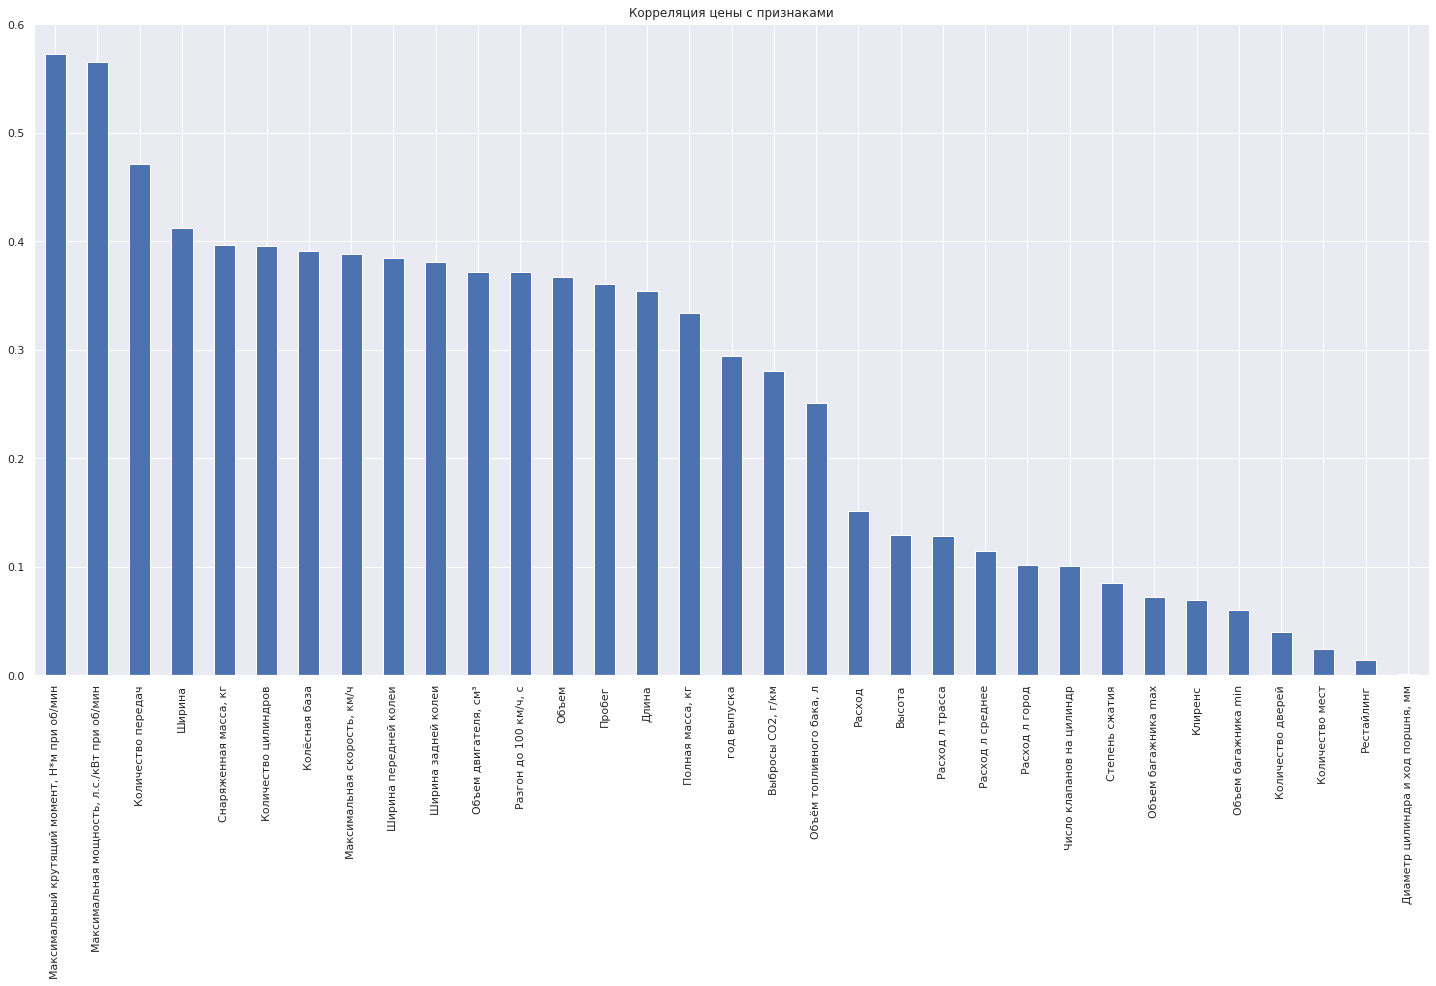

In [333]:
plt.figure(figsize=(25,12))
abs(src_dataset.corr()['Цена']).sort_values(ascending = False)[1:].plot(kind = 'bar', title="Корреляция цены с признаками")

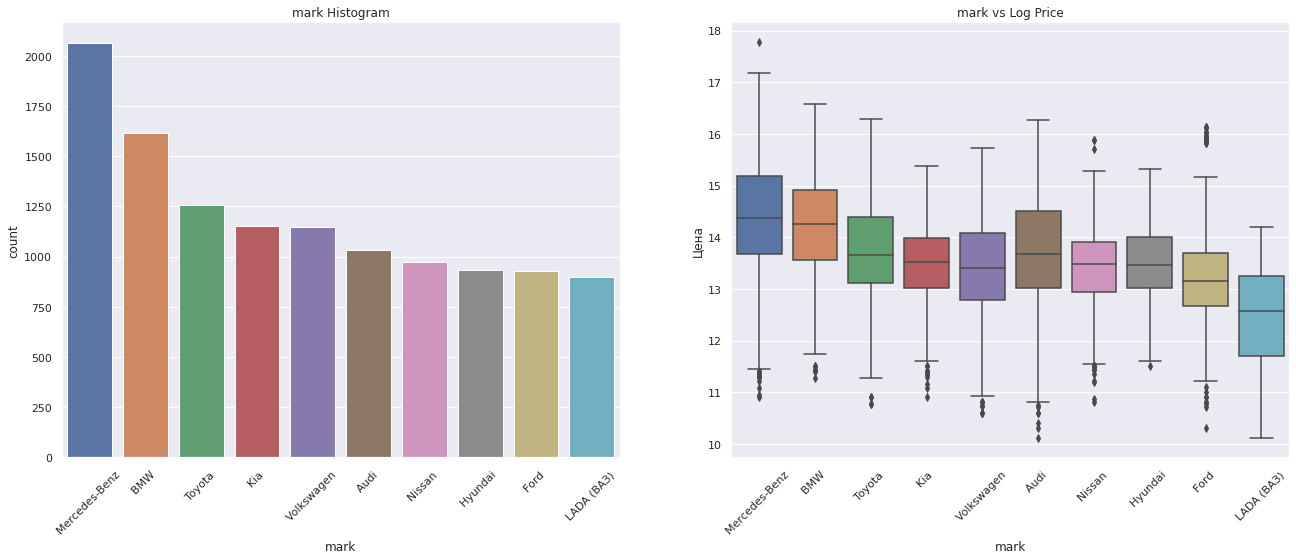

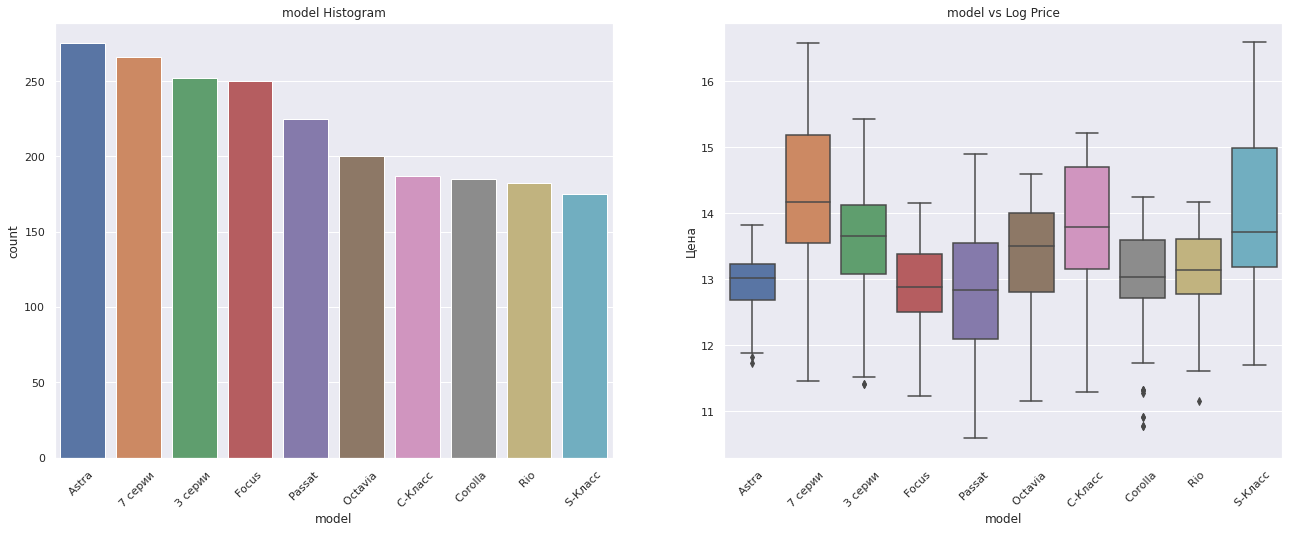

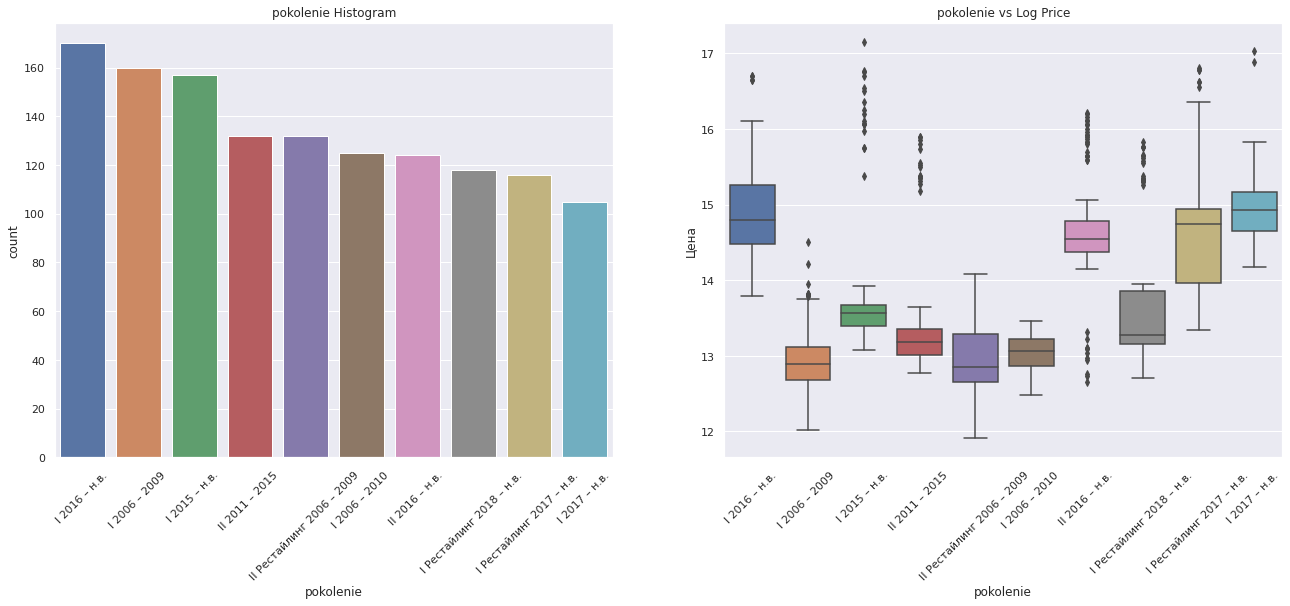

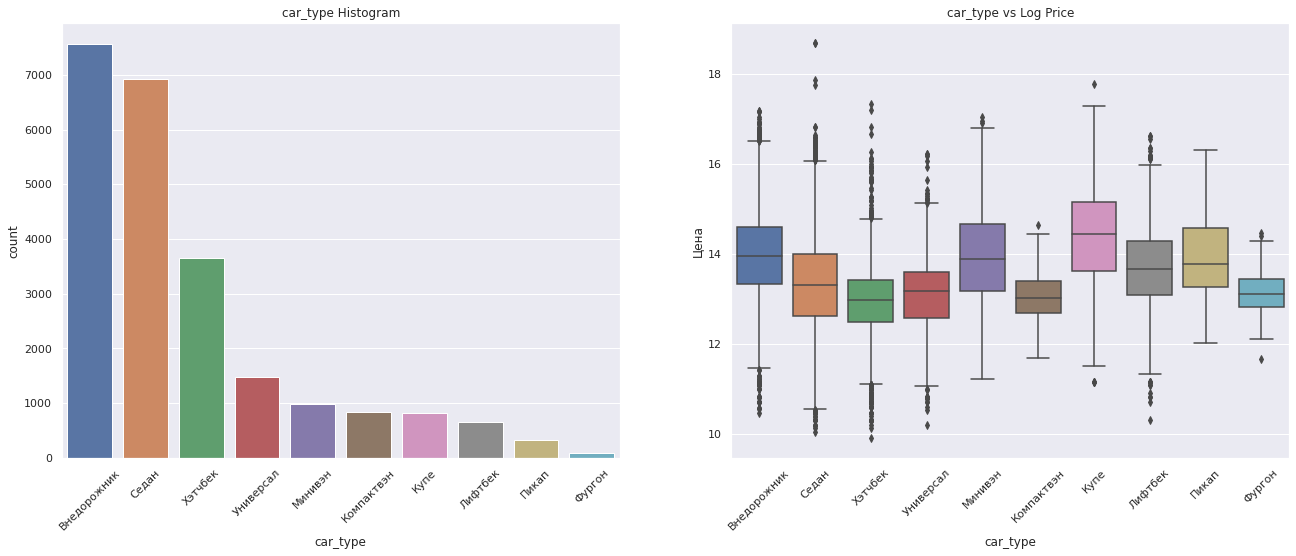

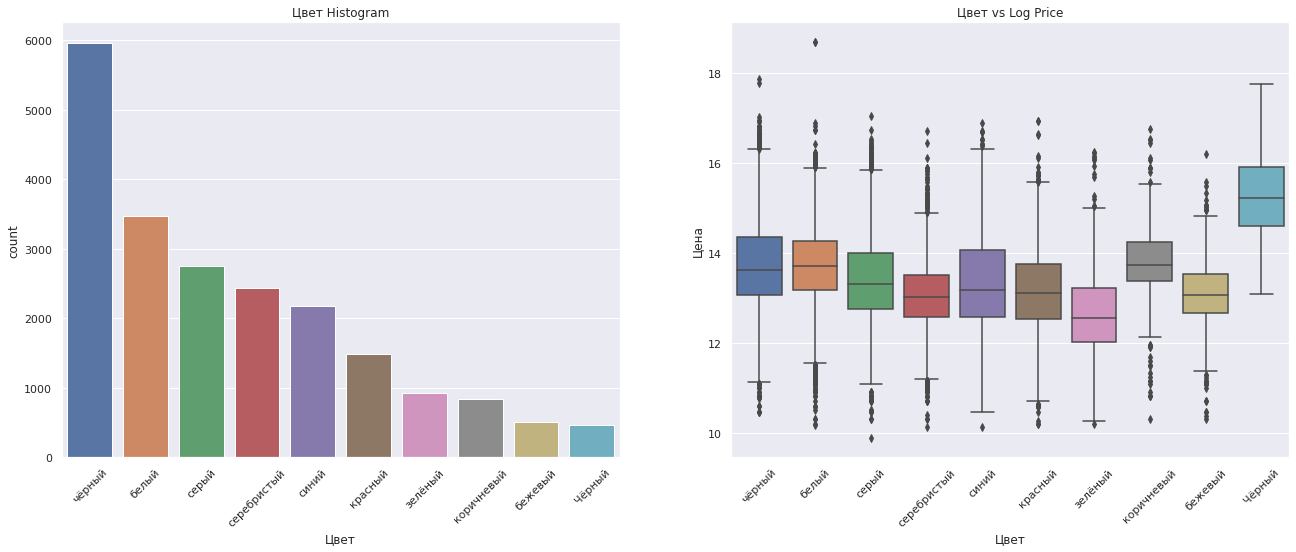

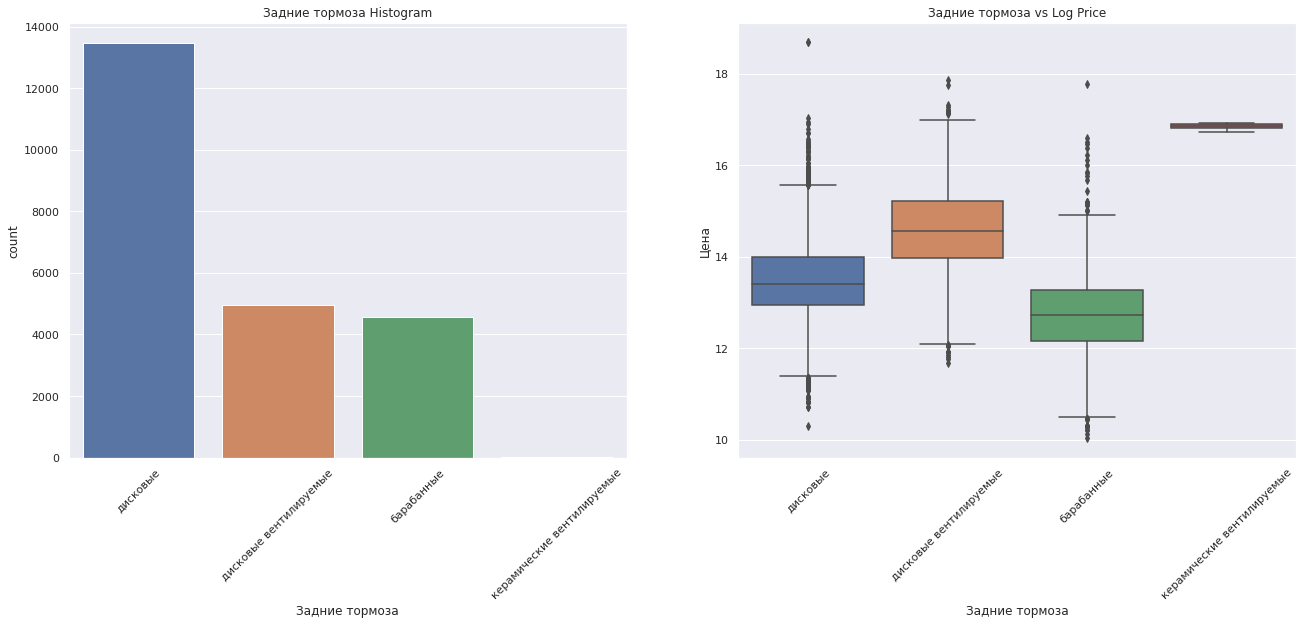

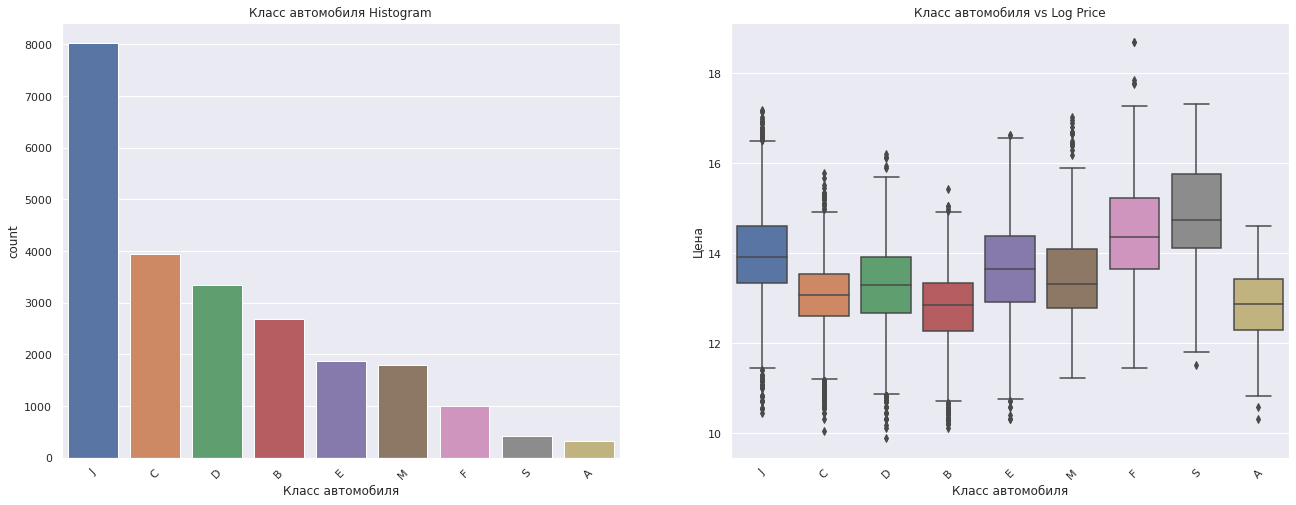

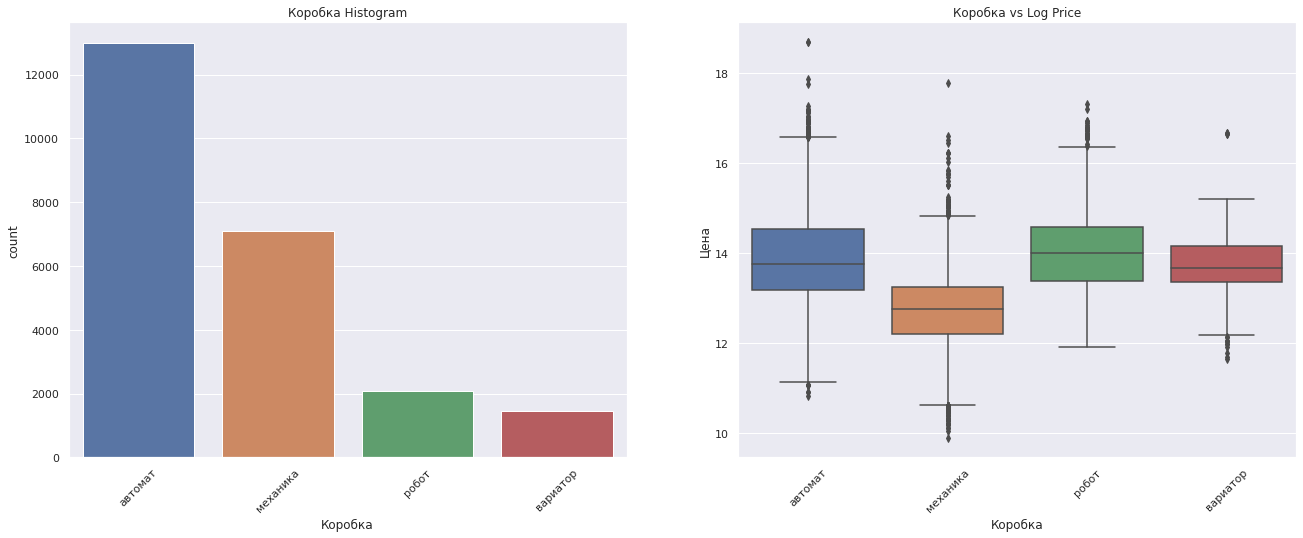

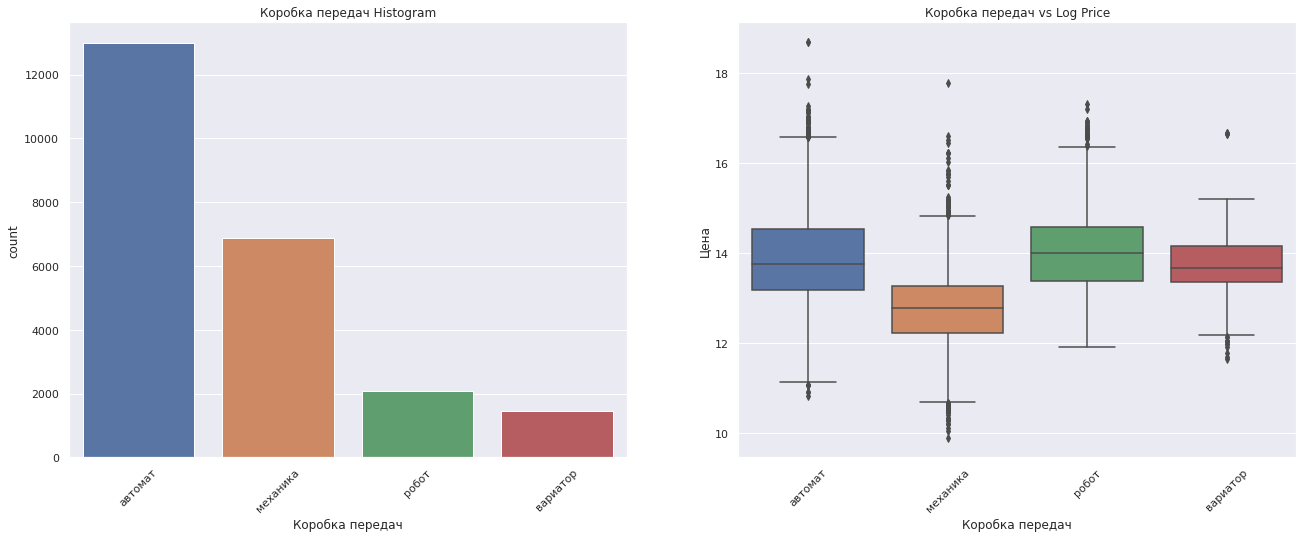

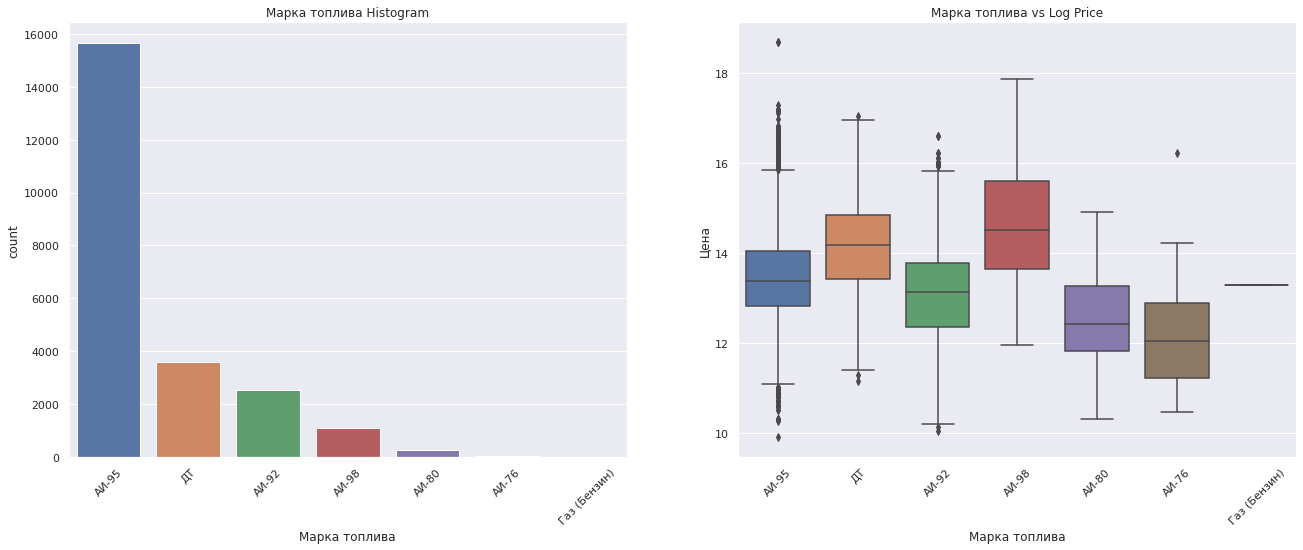

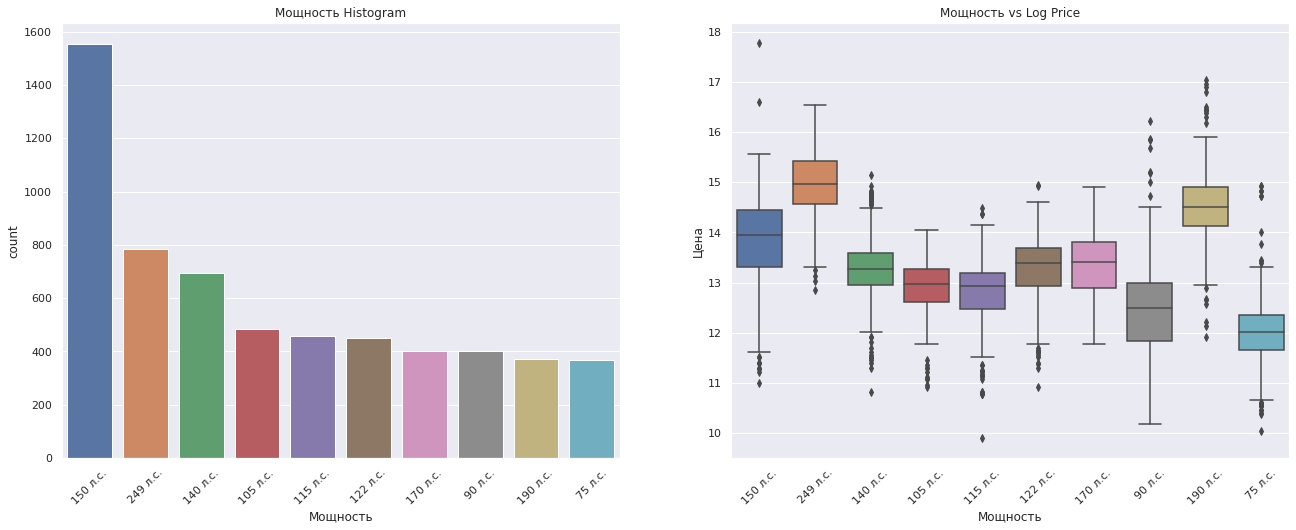

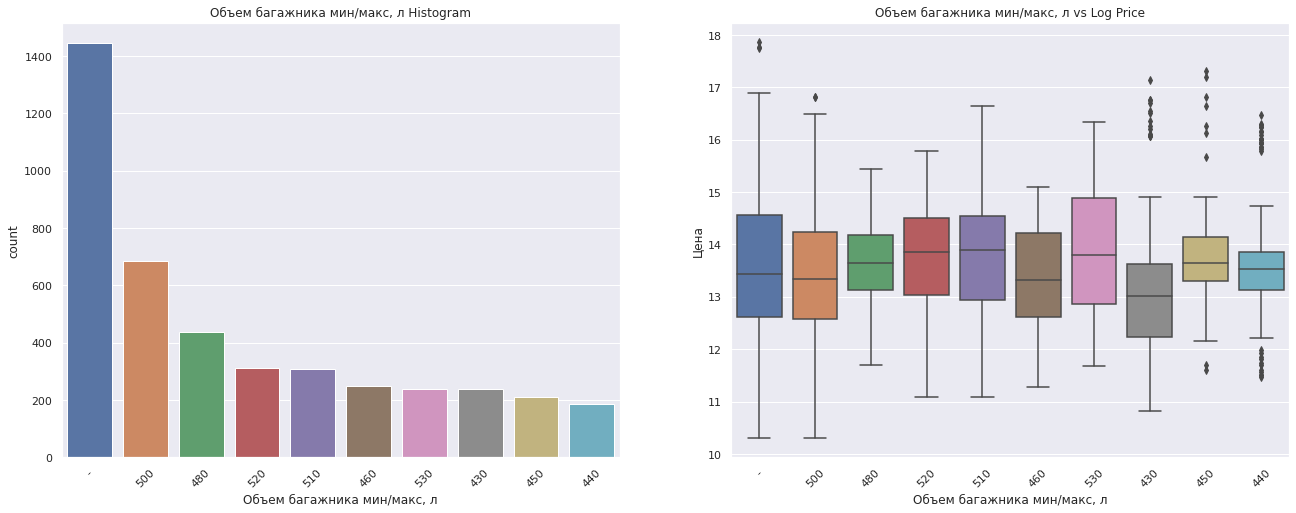

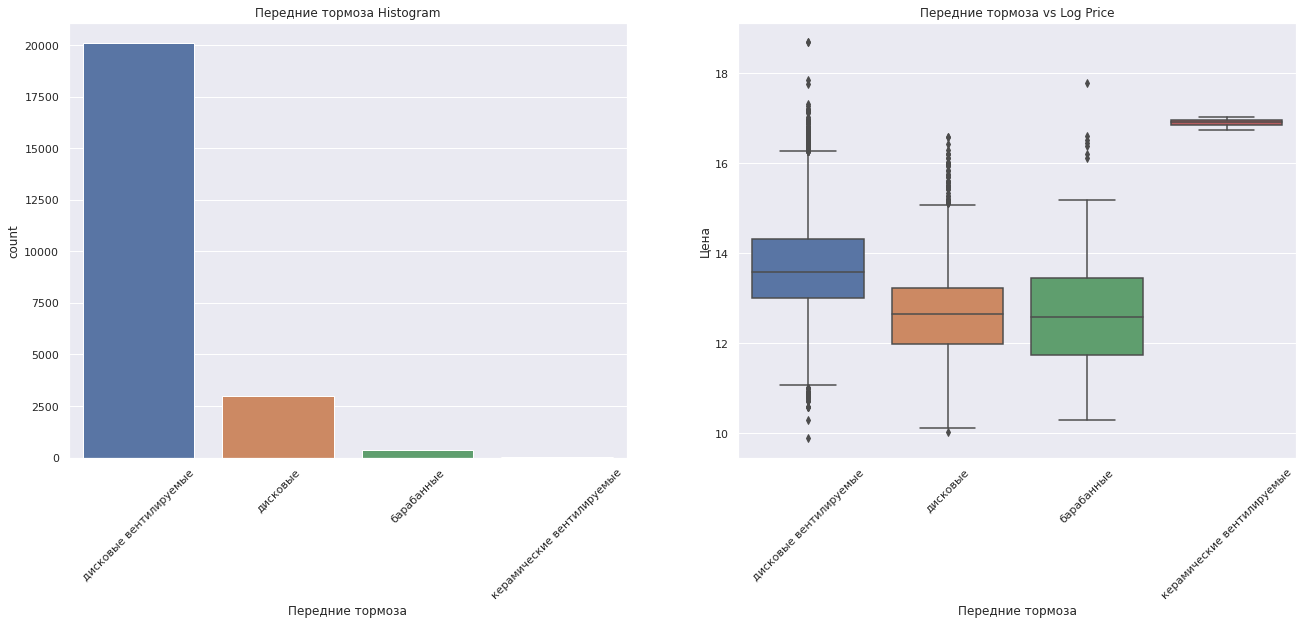

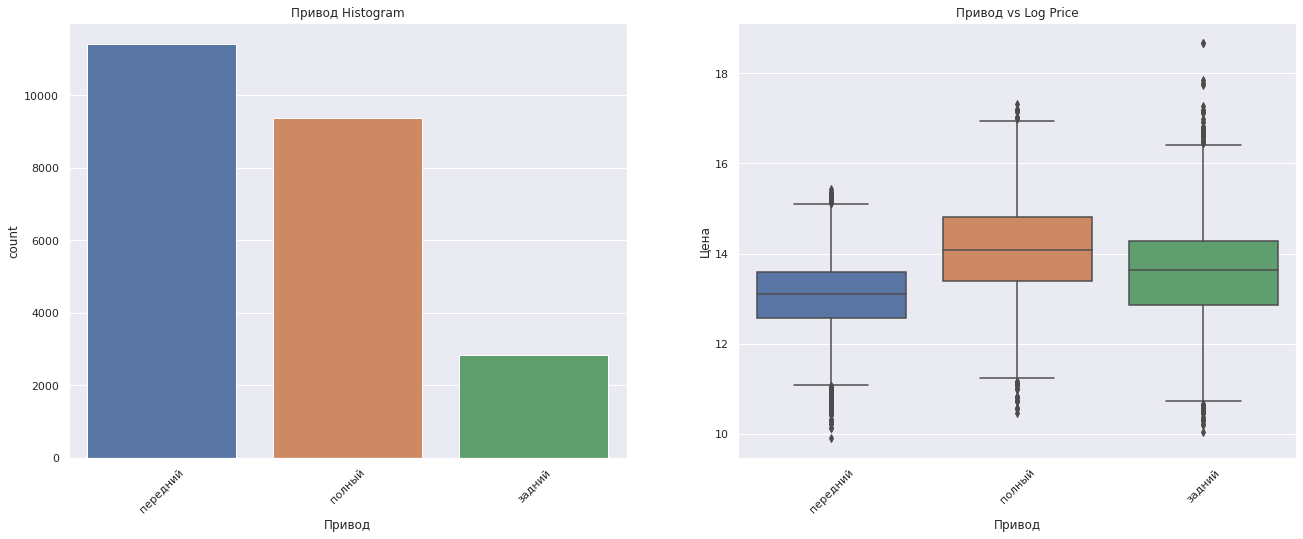

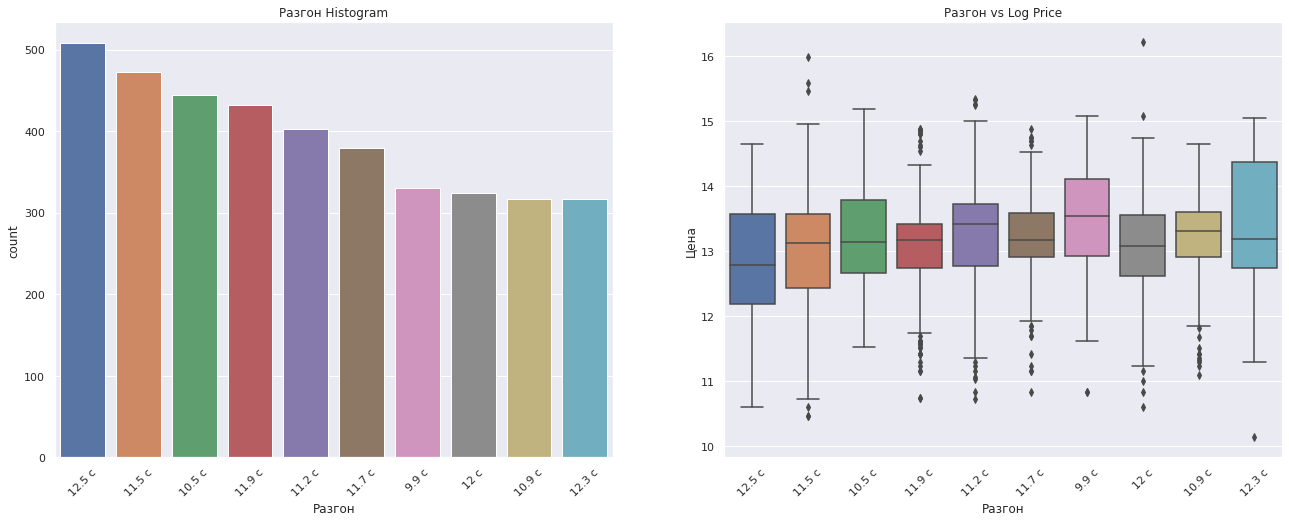

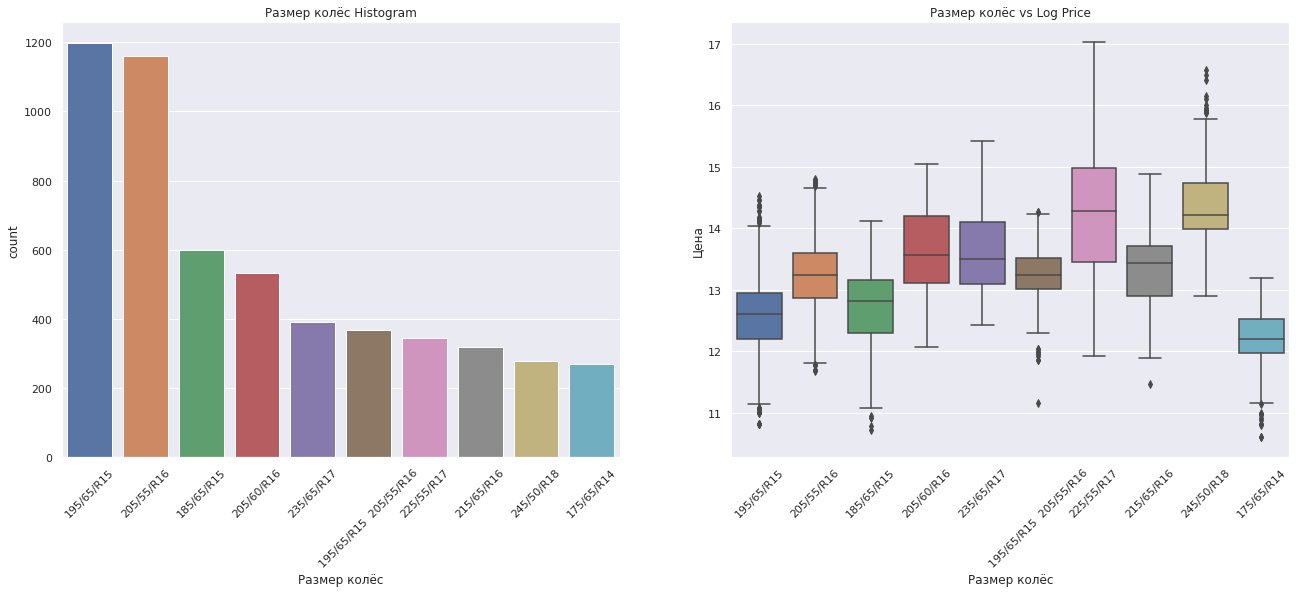

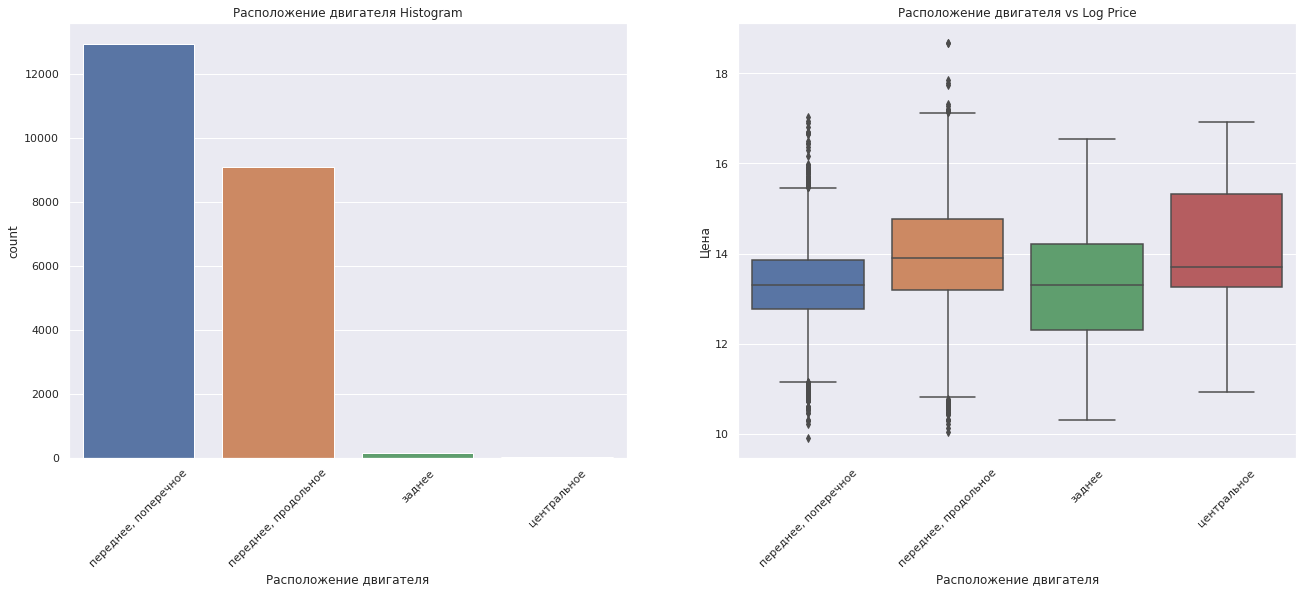

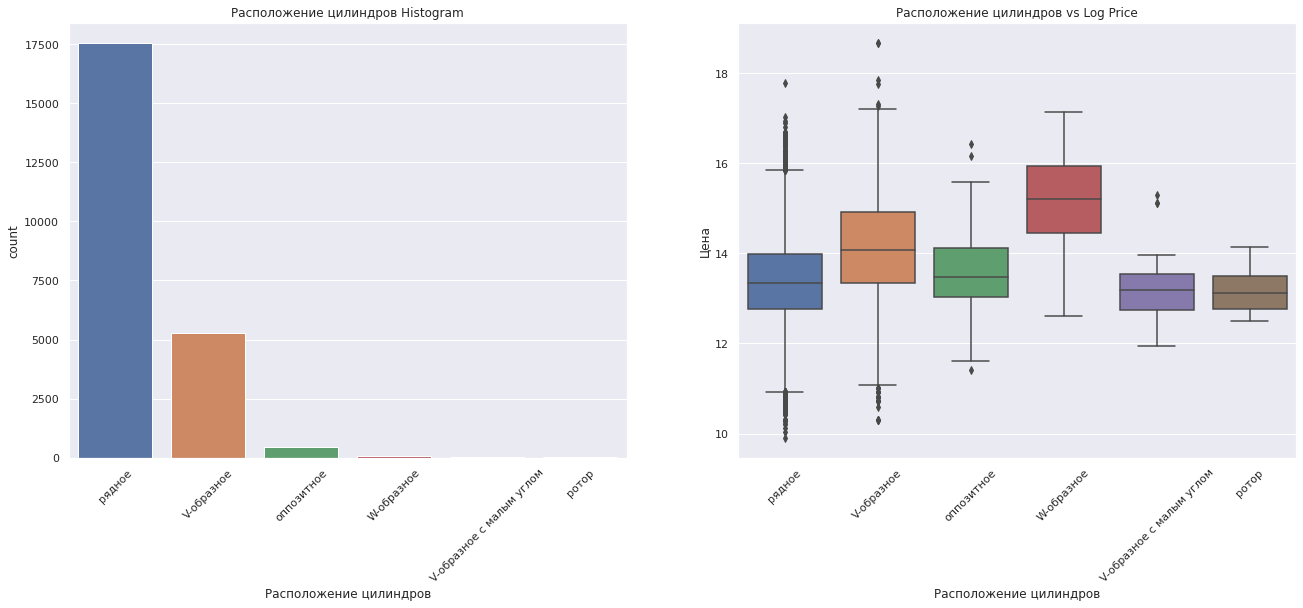

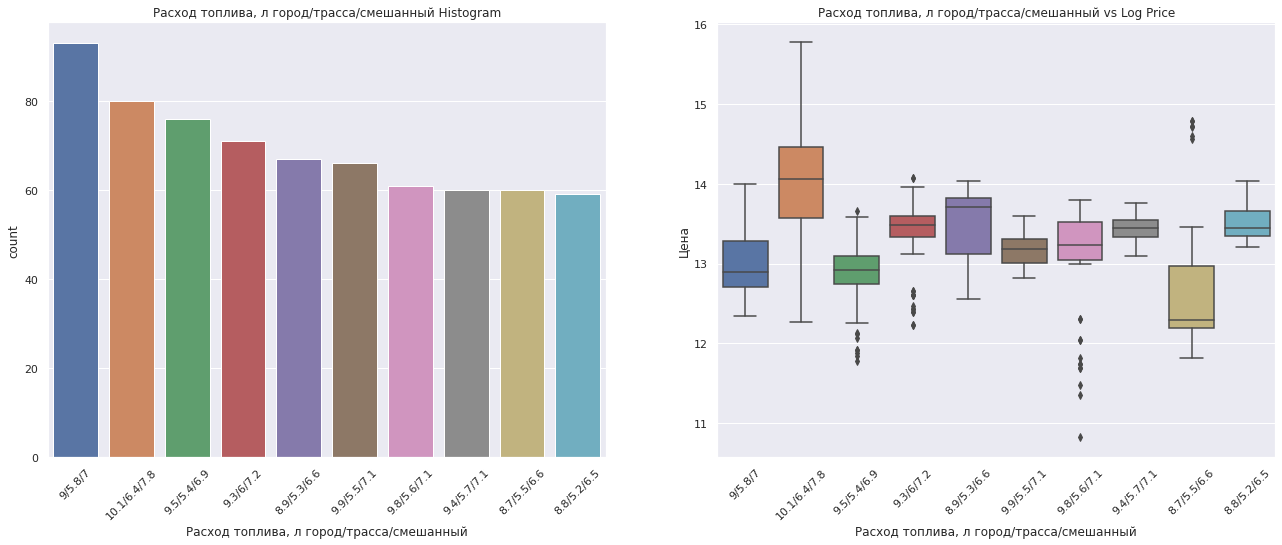

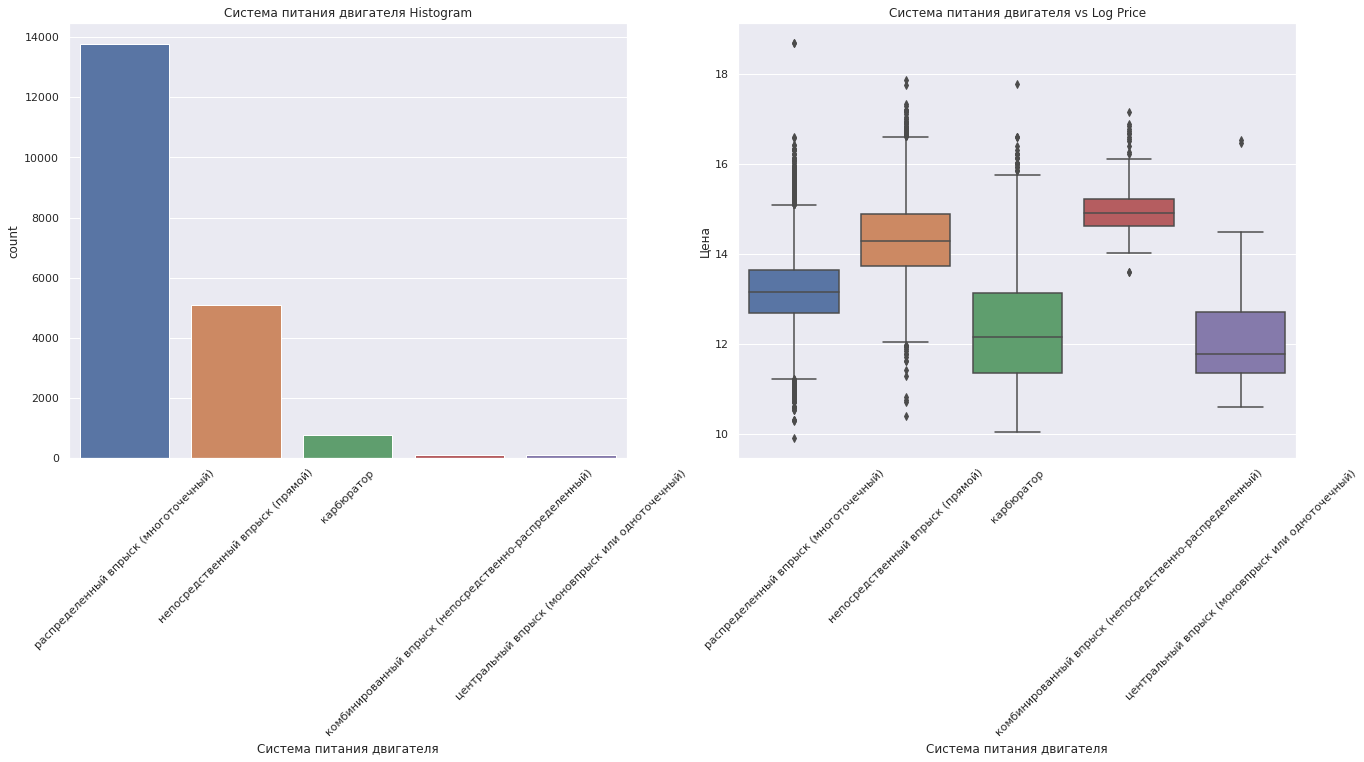

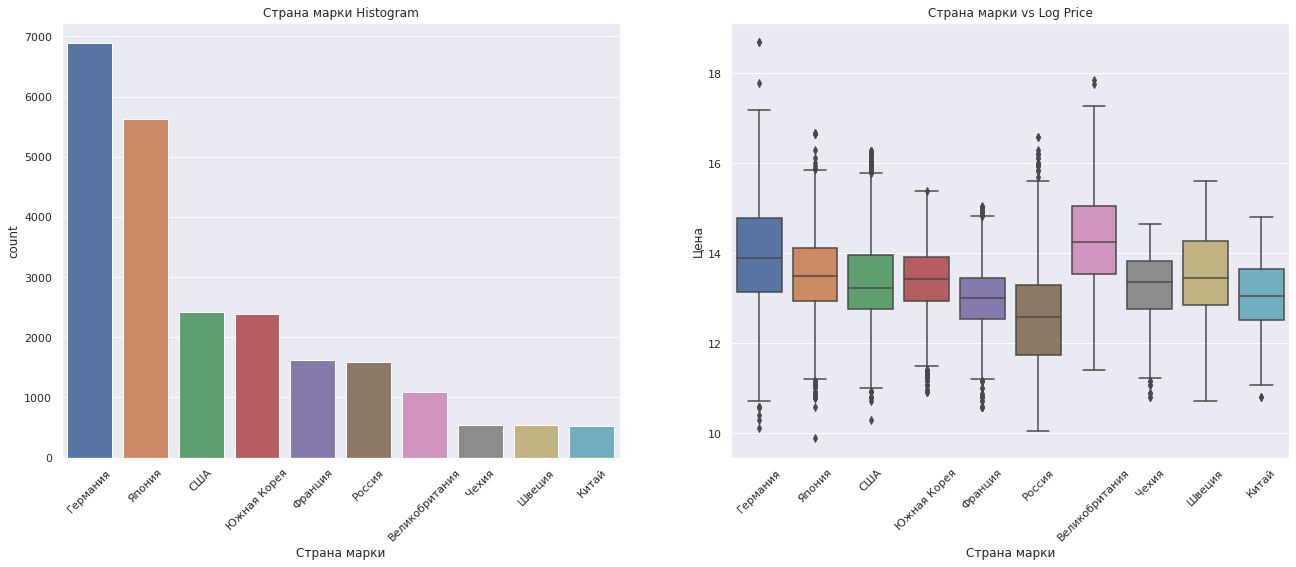

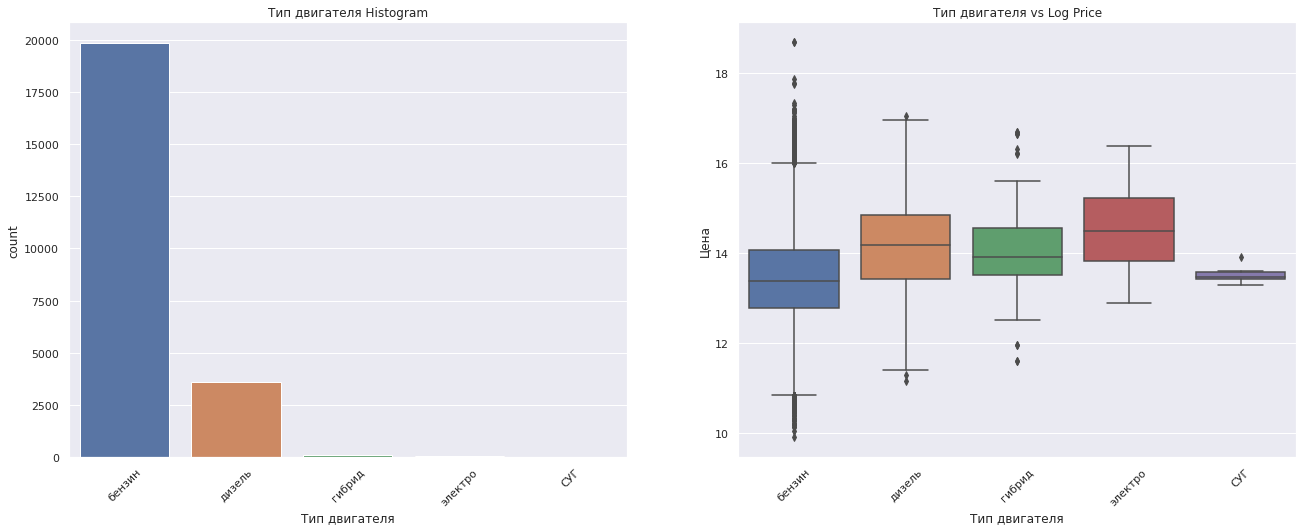

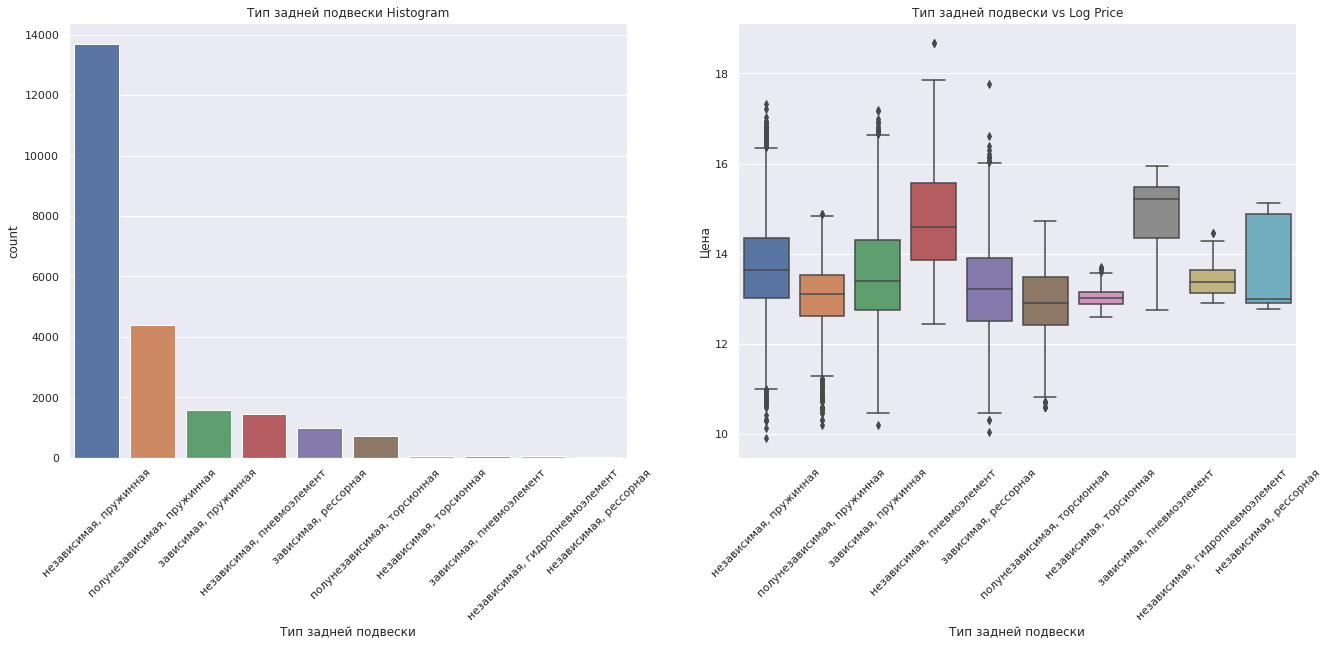

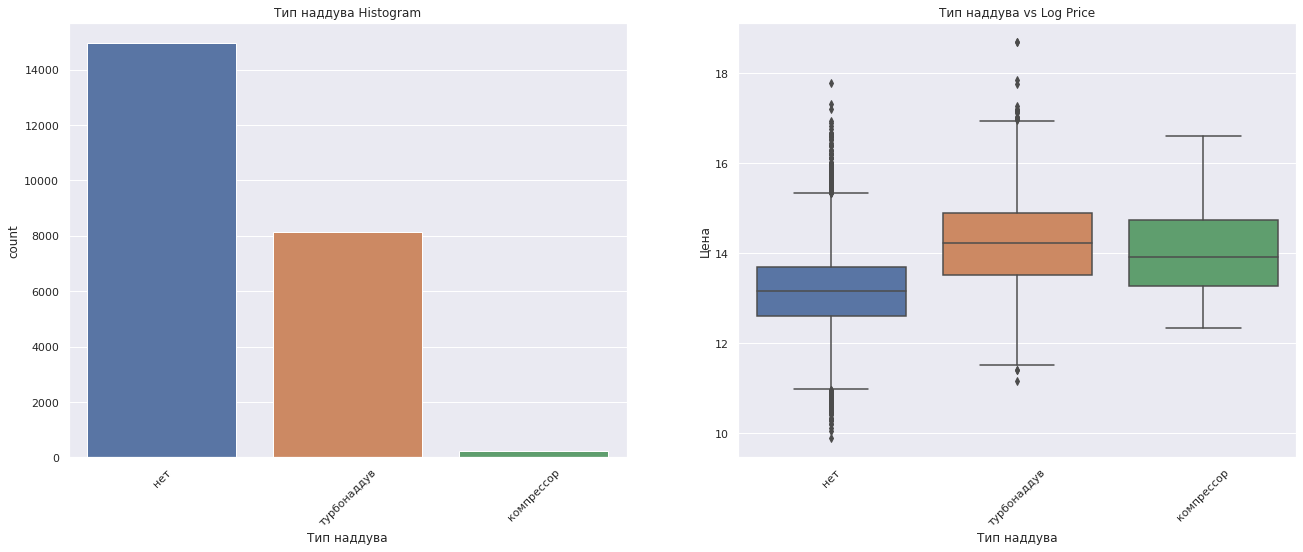

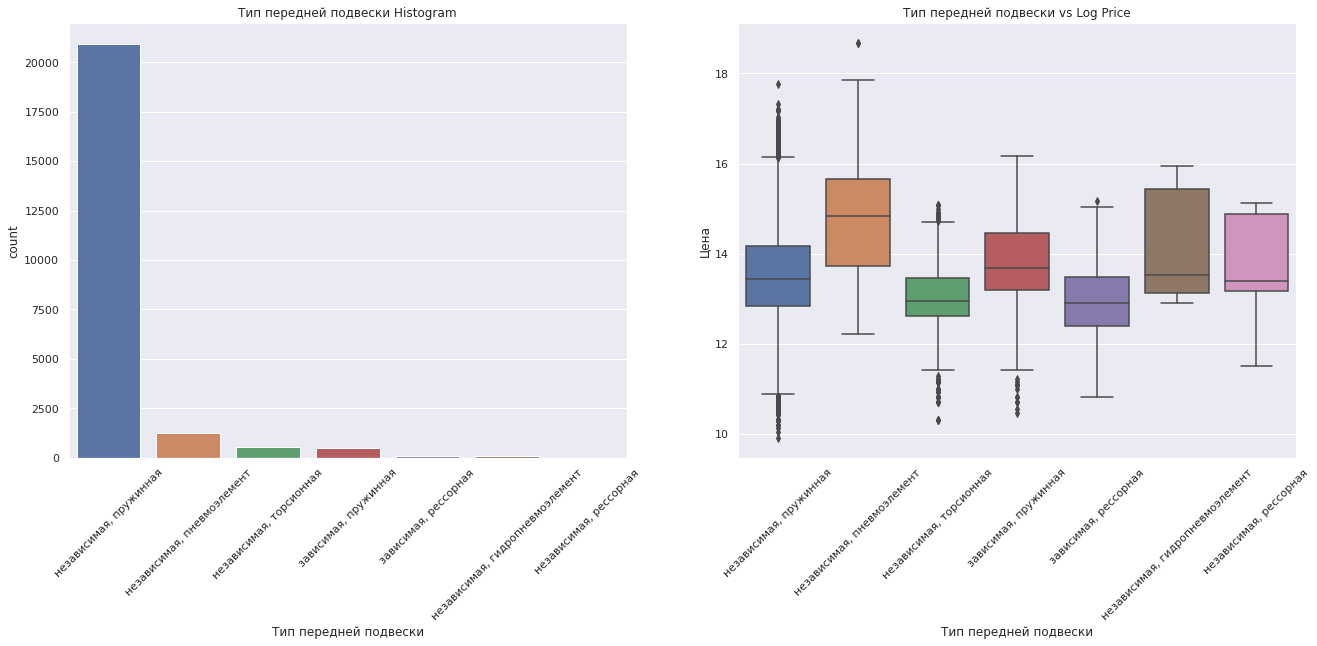

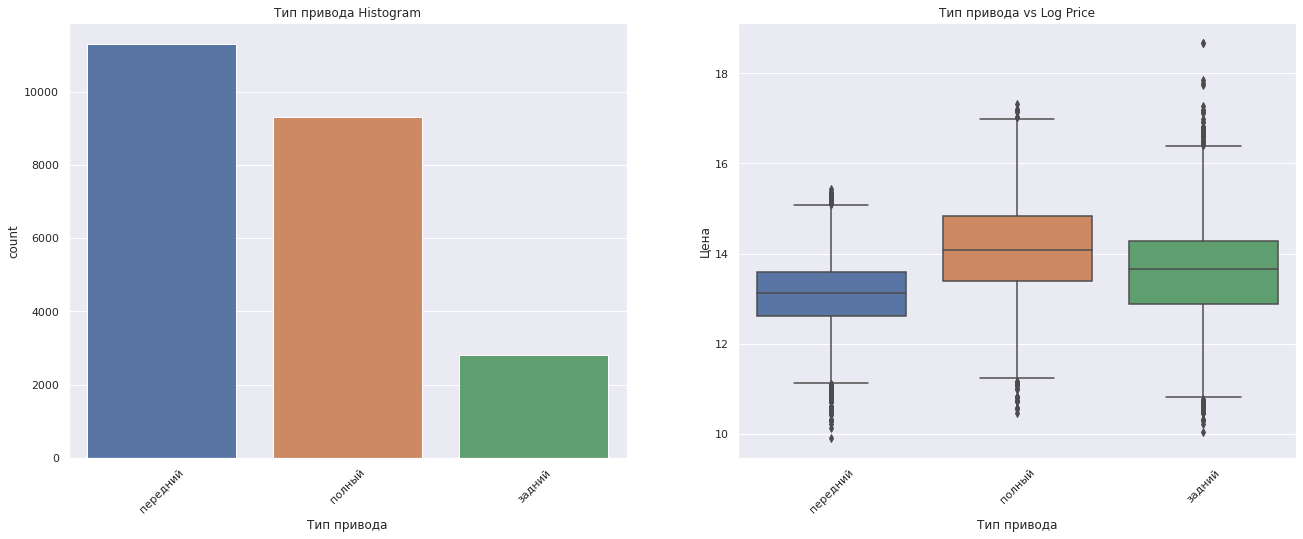

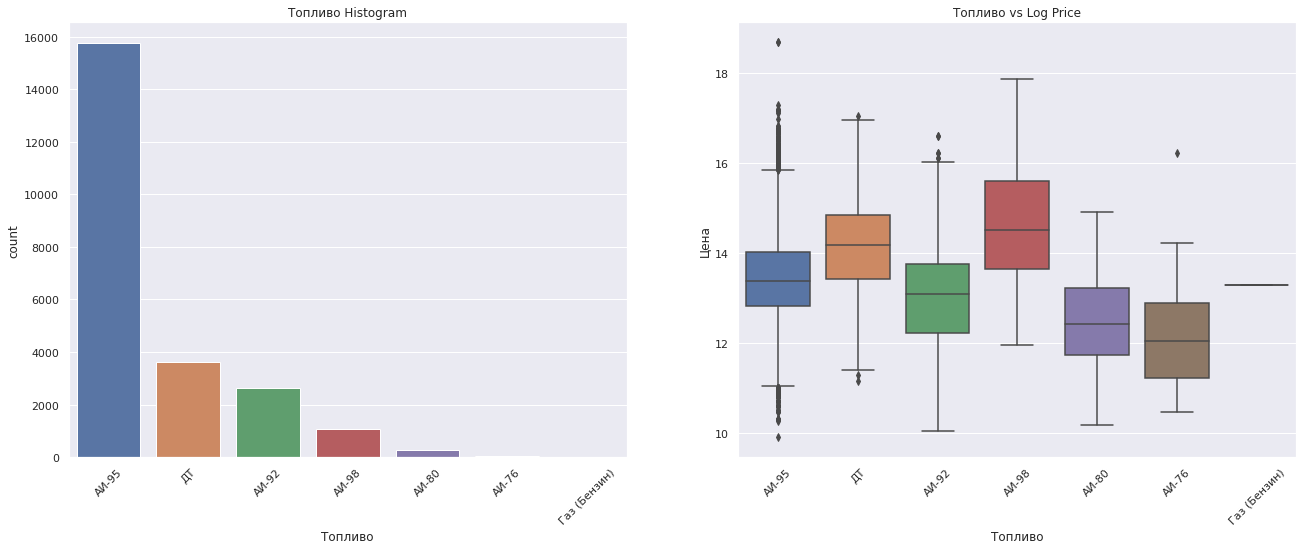

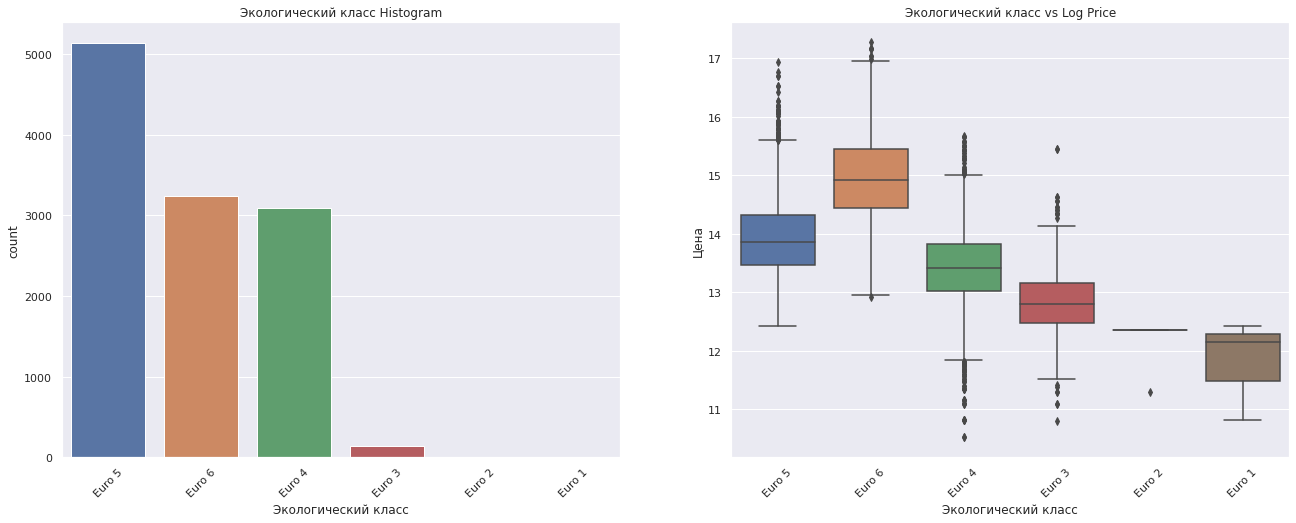

In [313]:
numbers_cols, categorical_cols = get_cols(src_dataset)

for column in categorical_cols:

    columns_most_freq = list(src_dataset[column].value_counts()[:10].sort_values(ascending=False).index)

    if '' in columns_most_freq:
        columns_most_freq = columns_most_freq.drop('')

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,8))

    plt.subplot(1,2,1)
    plt.title(f'{column} Histogram')
    sns.countplot(src_dataset[src_dataset[column].isin(columns_most_freq)], x=column, order=columns_most_freq)

    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    plt.title(f'{column} vs Log Price')
    ax = sns.boxplot(src_dataset[src_dataset[column].isin(columns_most_freq)], x=column, y=np.log(src_dataset["Цена"]), order=columns_most_freq)
    plt.xticks(rotation=45)

    plt.show()

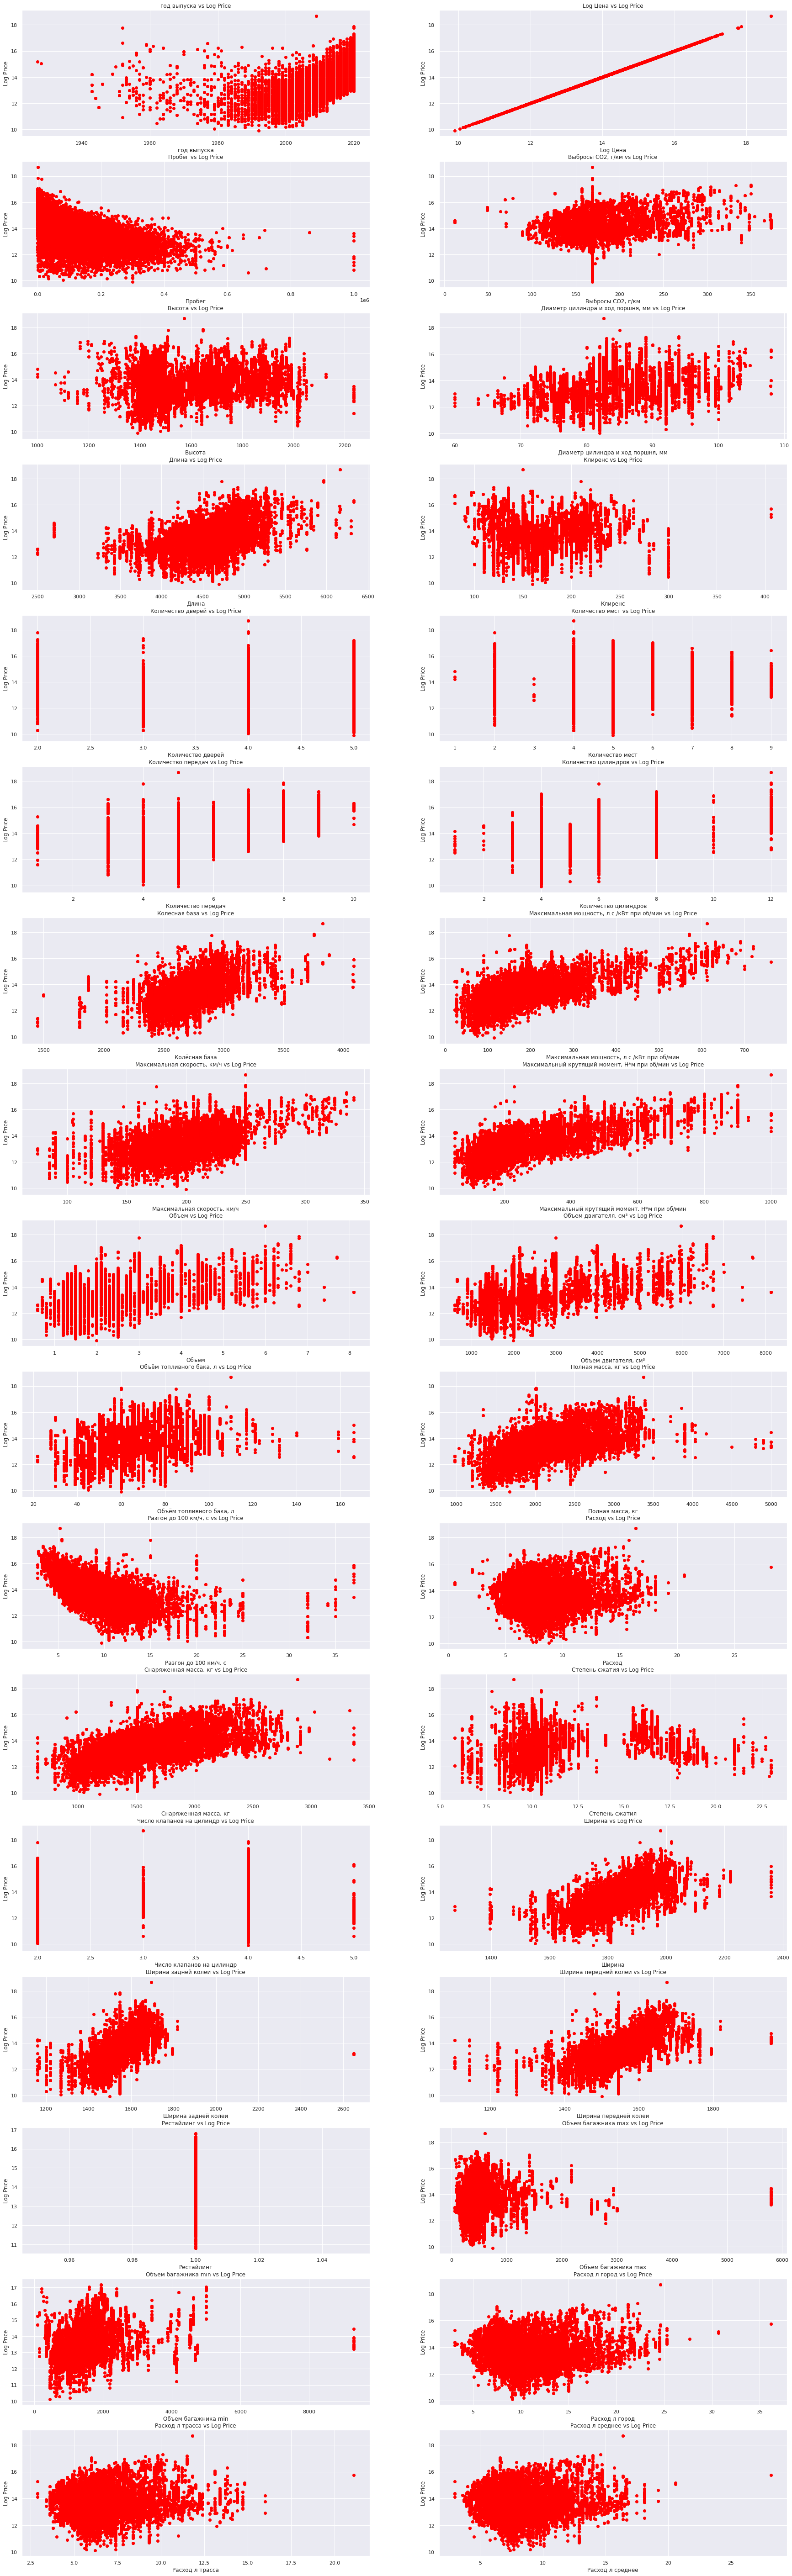

In [314]:
def scatter(column, fig):
    plt.subplot(33, 2, fig)
    ax = plt.scatter(
        x=[price if 'Цена' not in column else np.log(price) for price in src_dataset[src_dataset[column] > 0][column]],
        y=np.log(src_dataset[src_dataset[column] > 0].Цена),
        color = 'red'
    )
    plt.title(f'{column} vs Цена', fontsize=40)
    plt.title(f'{column} vs Цена' if 'Цена' not in column else f'Log {column} vs Цена')
    plt.ylabel('Log Price')
    plt.xlabel(column if 'Цена' not in column else f'Log {column}')

plt.figure(figsize=(35, 200))

for i, column in enumerate(numbers_cols):
    scatter(column, i + 1)